<a href="https://colab.research.google.com/github/IROHA0508/Machine_Learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EB%9F%AC__BreamsAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#혼자 공부하는 머신러닝 + 딥러닝

##1. 생선 분류 문제
### Data : https://www.kaggle.com/aungpyaeap/fish-market
#### 목적 : 가장 간단한 머신러닝 알고리즘 중 하나인 k-최근접 이웃을 사용하여 2개의 종류를 분류하는 머신러닝 모델을 훈련한다

In [ ]:
# 생선의 길이와 생선의 무게
# 첫번째 feature - 생선의 길이 // 두번째 feature - 생선의 무게
# 도미의 정보

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

생선의 길이와 무게를 표로 보면 어려움
따라서 matplot 라이브러리를 이용해서 그래프로 확인하고자 함

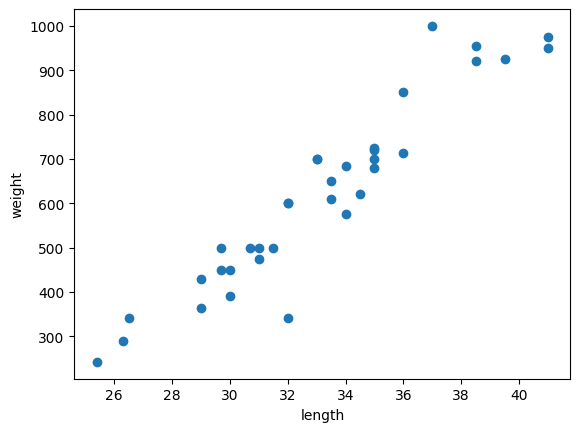

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 빙어의 정보

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

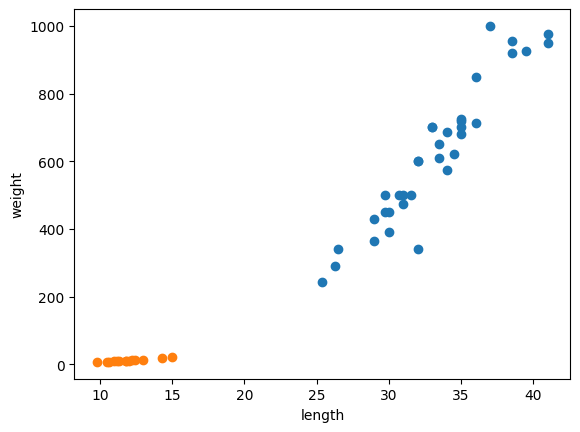

In [ ]:
# 도미와 빙어에 대한 정보 또한 산점도로 그려보기

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#####가장 간단한 k-최근접 이웃 (K- Nearest Neighbors) 알고리즘을 사용해 도미와 빙어의 데이터를 구분

#####일단 도미와 빙어 데이터를 하나의 데이터로 합침

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [11]:
print(length)
print(weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


scikit-learn을 이용해서 머신러닝을 함  
scikit-learn을 사용하기 위해서는 각 특성의 리스트를 세로로 늘어뜨린 2차원 리스트를 사용해야한다  
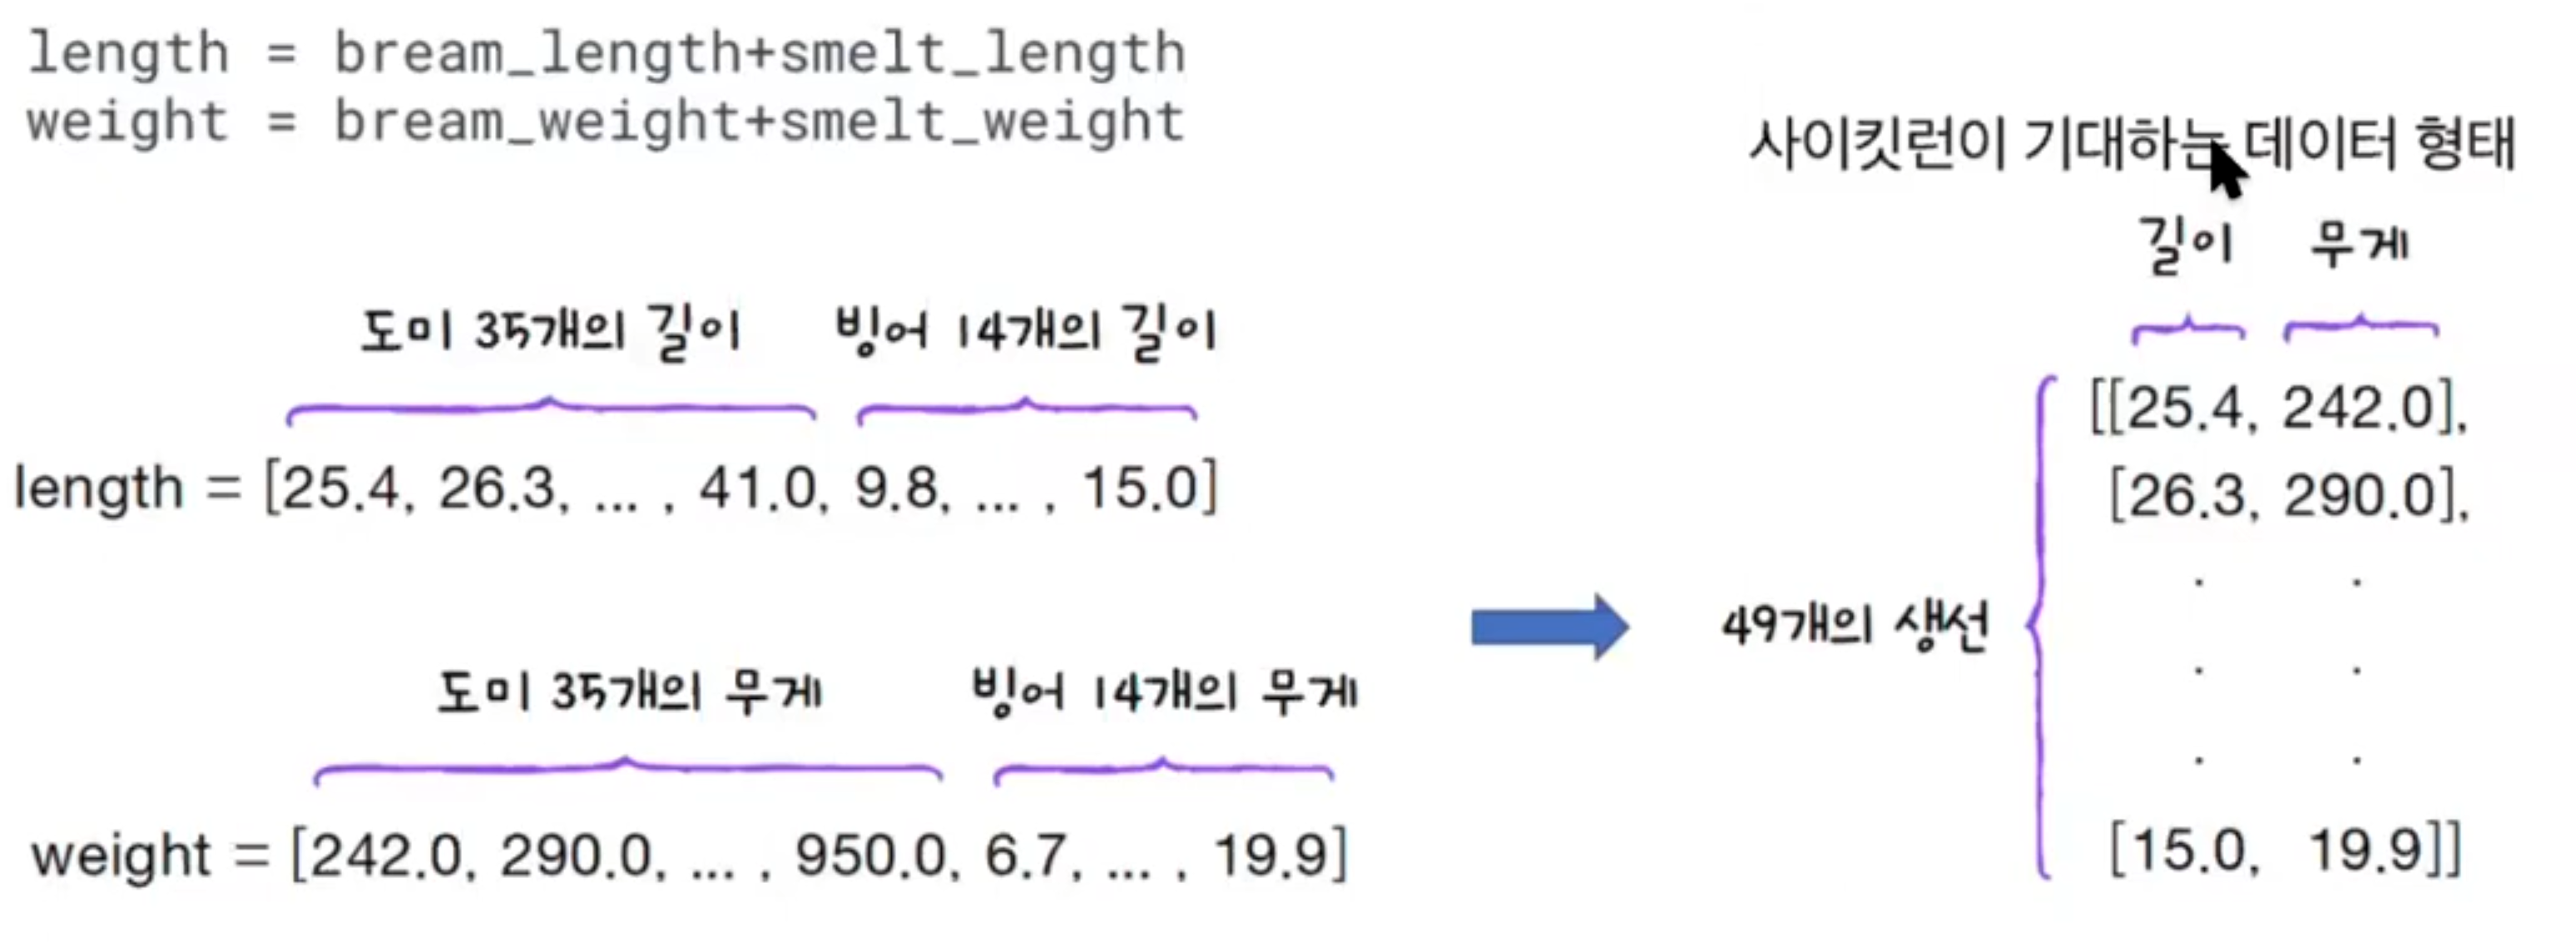

이렇게 하기 위해서 파이썬의 zip() 함수를 사용한다

In [7]:
fish_data = [[l,w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [12]:
# 위와 같은 결과를 내기 위해서 for문을 바깥으로 빼면 append 함수를 사용해야 함
fish_data = []
for l, w in zip(length, weight):
  fish_data.append([l,w])

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


#####정답 데이터를 생성해야함  
#####정답 데이터를 구성할 때, 도미는 1, 빙어는 0으로 분류해준다  
#####도미를 첫번째로 빙어를 두번째로 나열했으므로 정답리스트에는 1이 35, 0이 14번 등장한다

In [13]:
# 곱셈 연산자를 사용해서 파이썬 리스트를 반복시킨다

fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


사이킷런에서 k-최근접 이웃 알고리즘을 구현한 KNeighborsClassifier를 import 한다

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# 해당 클래스의 객체 생성
kn = KNeighborsClassifier()

In [17]:
# 준비한 data를 가지고 모델을 훈련시키기 위해서 fit() 함수를 사용한다
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [19]:
# 모델 kn이 얼마나 잘 훈련되었는지 평가하기 위해 score() 메소드를 사용
kn.score(fish_data, fish_target)

1.0

In [20]:
# predict 메소드는 새로운 데이터의 정답을 예측하기 위해 사용함
kn.predict([[30,600]])

array([1])

###알고리즘의 장점과 단점  
장점 : 새로운 데이터에 대해 예측할 때 가장 가까운 직선 거리에 어떤 데이터가 있는지 판단하면 됨  
단점 : 데이터가 아주 많은 경우에 사용하기 어려움

In [21]:
# _fit_X 에는 우리가 전달한 fish_data의 속성을 가짐
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [24]:
# _y에는 우리가 전달한 fish_target에 대한 정보를 가짐
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


실제로 k-최근접 이웃 알고리즘은 훈련되는게 아님!!  
새로운 Data가 들어오면 이미 가지고 있는 Data 값을 참고해서 구분하는 것

Default로 5개의 값을 참고하게 되어있다

In [26]:
# 49개의 data 값을 참고하게 하는 방법
kn49 = KNeighborsClassifier(n_neighbors = 49)

In [27]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

# 이 모델은 49개의 데이터 중에 도미가 35개 차지하므로 어떤 데이터를 넣어도 무조건 도미로 예측할 것!

0.7142857142857143

In [28]:
print(35/49)

0.7142857142857143
